# Part 1 - Initial IMDB Data Processing
- James M. Irving

## Business Problem

<img src="Images/movies-generic-header.png" width=300px>

> I have been hired to produce analyze IMDB's extensive publicly-available dataset, supplement it with financial data from TMDB's API, convert the raw data into a MySQL database, and then use that database for extracting insights and recommendations on how to make a successful movie.

I will use a combination of machine-learning-model-based insights and hypothesis testing to extract insights for our stakeholder.
    

  
### Specifications/Constraints    
- The stakeholder wants to focus on attributes of the movies themselves, vs the actors and directors connected to those movies. 
- They only want to include information related to movies released in the United States.
- They also did not want to include movies released before the year 2000.
- The stakeholder is particularly interested in how the MPAA rating, genre(s), runtime, budget, and production companies influence movie revenue and user-ratings.

# Initial IMDB Data Processing

### IMDB Movie Metadata
- I will download fresh movie metadata from IMDB's public datasets and filter out movies that meet the stakeholder's requirements/constraints.

- IMDB Provides Several Files with varied information for Movies, TV Shows, Made for TV Movies, etc.
    - Overview/Data Dictionary: <a href="https://www.imdb.com/interfaces/" target="_blank">https://www.imdb.com/interfaces/</a>

    - Downloads page: <a href="https://datasets.imdbws.com/" target="_blank">https://datasets.imdbws.com/</a>
- Files to use:
    - title.basics.tsv.gz
    - title.ratings.tsv.gz
    - title.akas.tsv.gz
  

<blockquote style="font-weight:bold;"> 👉<a href="#revisit">Click here</a> to jump to Part 1 - Revisited!</blockquote>

## Imports and Downloading Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [4]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [5]:
## Making "Data" Folder to save IMDB files
os.makedirs("Data/",exist_ok=True)
sorted(os.listdir("Data/"))

['.DS_Store',
 '.ipynb_checkpoints',
 'For Tableau',
 'combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'name_basics.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_crew.csv.gz',
 'title_principals.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_ap

## Processing Title Basics

In [6]:
## title basics 
url_title_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'
basics = pd.read_csv(url_title_basics, sep='\t',low_memory=False)
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10335436 entries, 0 to 10335435
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 709.7+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### Specified Filtering/Cleaning Steps:
- Permanent Steps
    - Replace "\N" with np.nan
    - keep only titleType==Movie
    - keep startYear 2000-2022
    
- Steps to Revisit/Reconsider:
    - Eliminate movies that include  "Documentary" in genre (see tip below)
    - Eliminate movies that are null for runtimeMinutes
    - Eliminate movies that are null for genre


In [7]:
# pf.check_nulls_nunique()
# def check_nulls_nunique(df,plot=True):
#     report = pd.DataFrame({"# null":df.isna().sum(),
#                  "% null":df.isna().sum()/len(df)*100,
#                  '# unique':df.nunique(),
#                           '% unique':df.nunique()/len(df)*100})
#     display(report.round(2))
#     if plot:
#         missingno.matrix(df)
#         plt.show()
    

#### Check for Nulls Values & \N placeholders

,# null,% null,# unique,% unique
tconst,0,0.0,10335436,100.00
titleType,0,0.0,11,0.00
primaryTitle,11,0.0,4647939,44.97
originalTitle,11,0.0,4670806,45.19
isAdult,0,0.0,12,0.00
startYear,0,0.0,153,0.00
endYear,0,0.0,96,0.00
runtimeMinutes,0,0.0,935,0.01
genres,18,0.0,2354,0.02


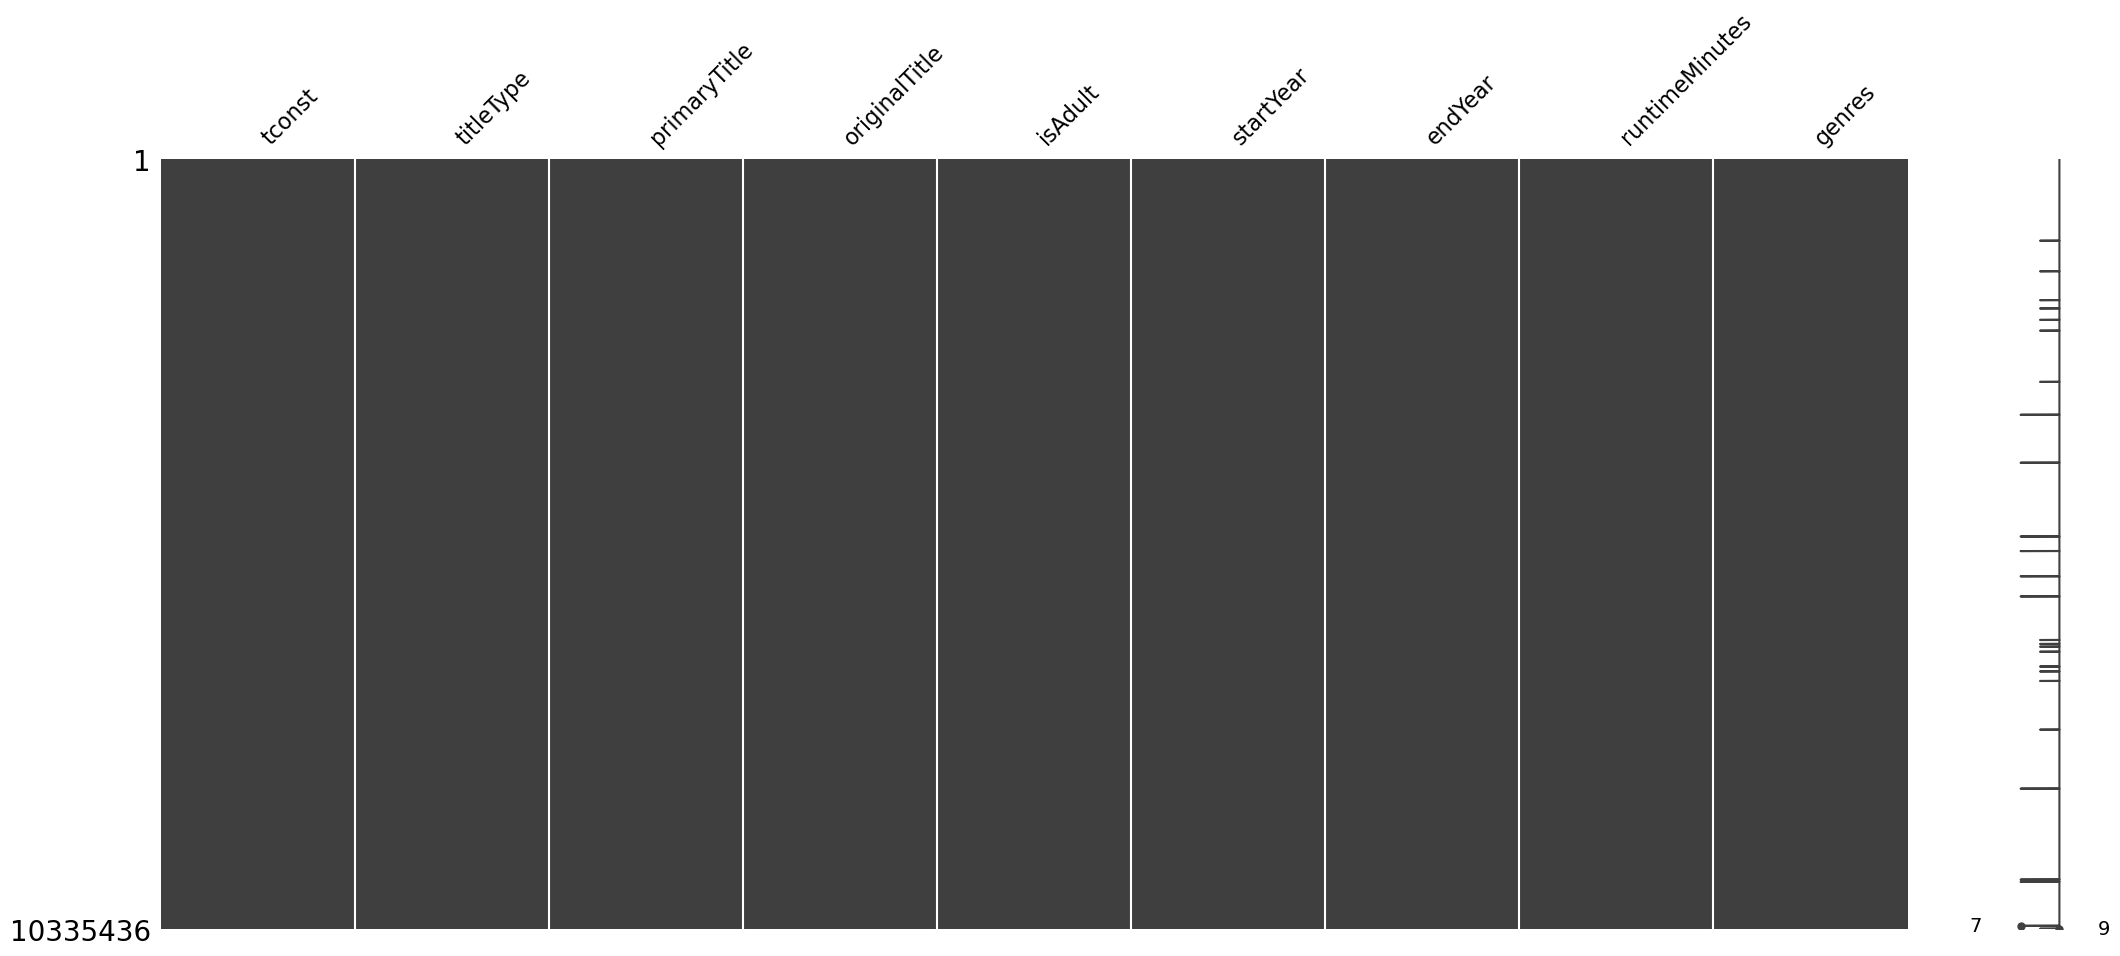

In [8]:
## checking null values
pf.check_nulls_nunique(basics)

,# null,% null,# unique,% unique
tconst,0,0.00,10335436,100.00
titleType,0,0.00,11,0.00
primaryTitle,11,0.00,4647939,44.97
originalTitle,11,0.00,4670806,45.19
isAdult,1,0.00,11,0.00
startYear,1384859,13.40,152,0.00
endYear,10220414,98.89,95,0.00
runtimeMinutes,7224299,69.90,934,0.01
genres,460591,4.46,2353,0.02


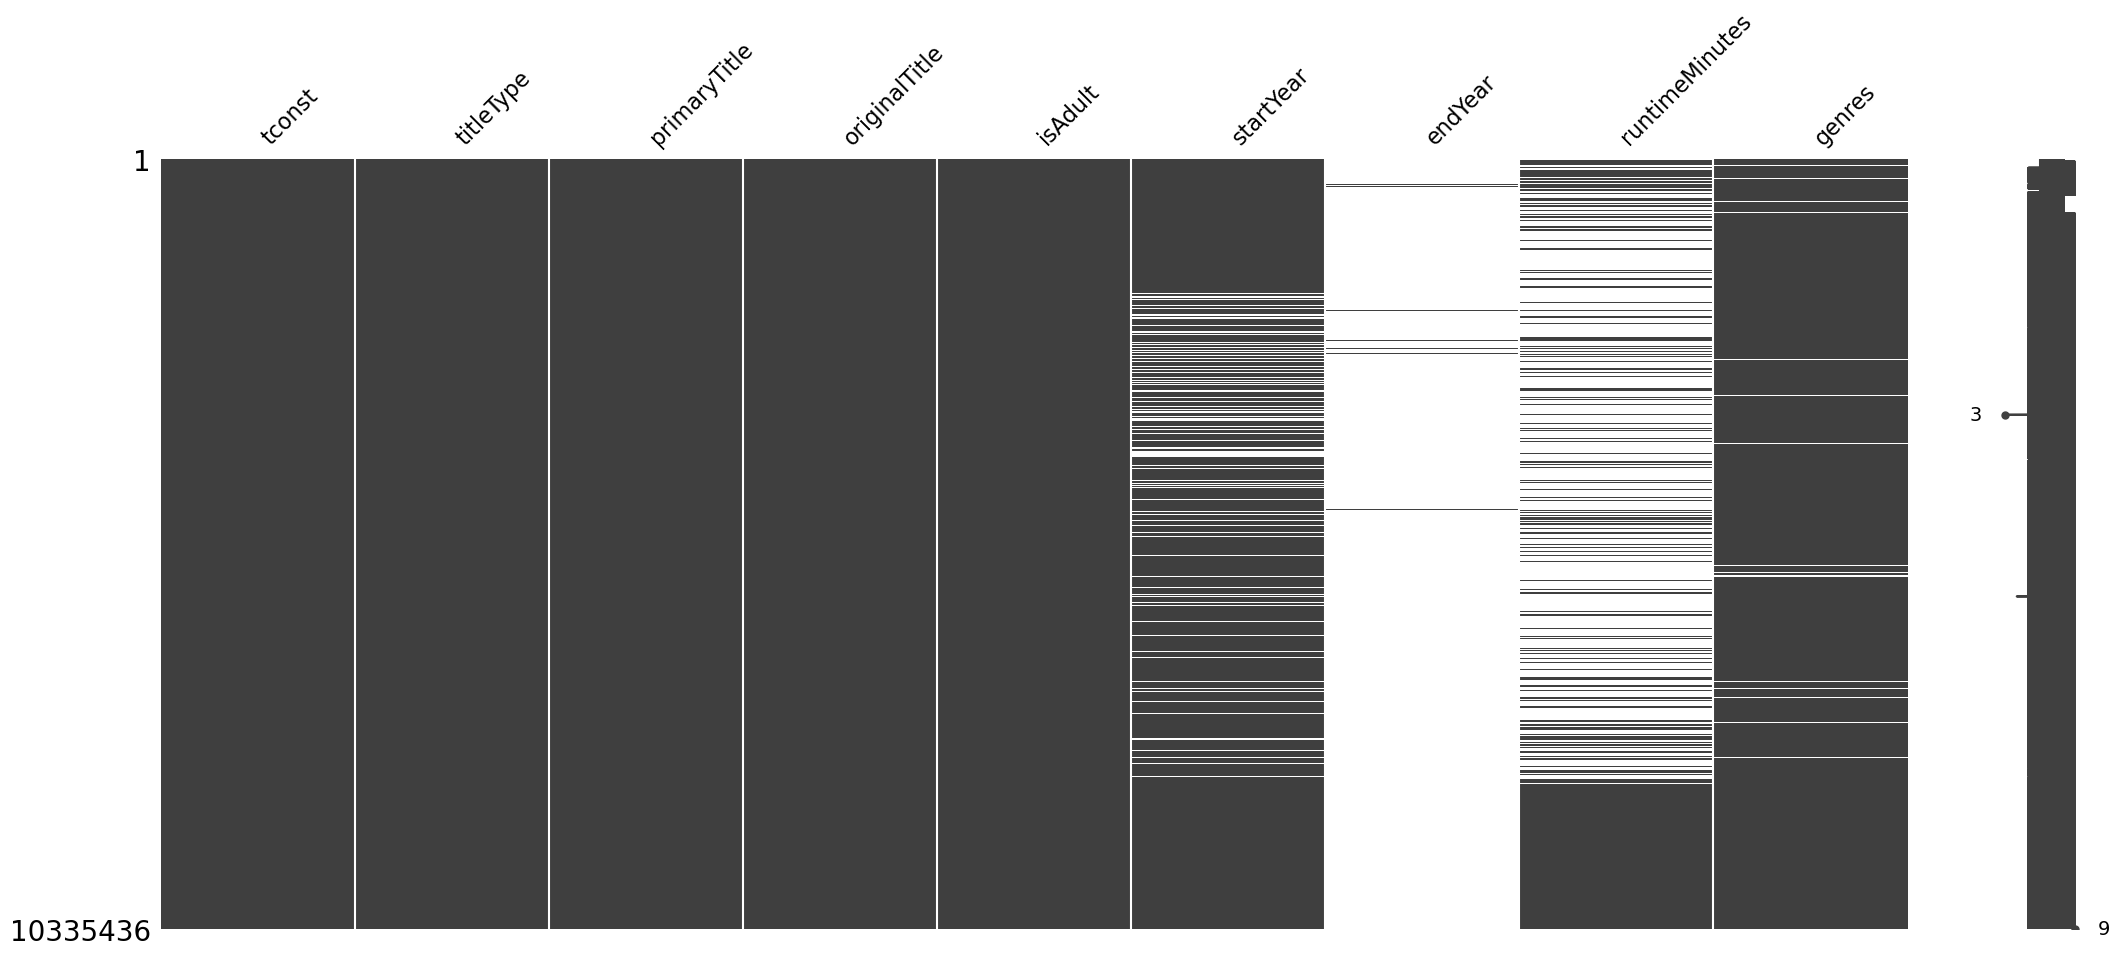

In [9]:
## Replace "\N" with np.nan
basics.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(basics)

##### Observations:
- Note: `endYear` is a pretty worthless column, in relation to movies. For TV shows, this would have potentially been worth keeping. 
    - Decision: Drop column.
- `tconst` vs `primary_title`:
    - I find it somehow odd that there are unique tconst values for every row, but that only ~ 46% of the titles are unique values.
        - Decision: change nothing, for now, but remember this for later.
        
- `genres` are missing for <5% of the movies.
    - Decision: we care about genre, so we will drop null values from genre.

- `startYear` is missing for 13% of the data. This may reflect movies that yet to be released.
    - Decision: drop null values for now. Alternative future approach would be to confirm movie status by joining with other table containing release information.
    
- `runtimeMinutes` is missing from a whopping 73% of the data. 
    - Decision: since this is a feature we care about, it is vital to our analysis. We will drop null values from this feature to reduce the overall number of API calls needed in Part 2.

In [10]:
## Eliminate movies that are null for runtimeMinute, genres, and startYear
basics = basics.dropna(subset=['runtimeMinutes','genres','startYear'])
pf.check_nulls_nunique(basics, plot=False)

,# null,% null,# unique,% unique
tconst,0,0.00,2837915,100.00
titleType,0,0.00,10,0.00
primaryTitle,1,0.00,1862892,65.64
originalTitle,1,0.00,1882561,66.34
isAdult,0,0.00,2,0.00
startYear,0,0.00,150,0.01
endYear,2784653,98.12,91,0.00
runtimeMinutes,0,0.00,912,0.03
genres,0,0.00,2219,0.08


In [11]:
## drop endYear
basics = basics.drop(columns=['endYear'])
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...
10335386,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary
10335392,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,43,"Family,Game-Show,Reality-TV"
10335427,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,11,"Adventure,Animation,Comedy"
10335434,tt9916856,short,The Wind,The Wind,0,2015,27,Short


### Filtering for Stakeholder Specifications

#### Keeping only Full-Length Movies Released in Theaters

In [12]:
## Checking title types
basics['titleType'].value_counts()

tvEpisode       1420743
short            613275
movie            386144
video            186147
tvMovie           92836
tvSeries          92090
tvSpecial         19543
tvMiniSeries      18104
tvShort            8694
videoGame           339
Name: titleType, dtype: int64

In [13]:
## keep only titleType==Movie
basics = basics.loc[ basics['titleType']=='movie']
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
10335286,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
10335327,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
10335354,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
10335376,tt9916730,movie,6 Gunn,6 Gunn,0,2017,116,Drama


#### Eliminating Documentaries

In [14]:

is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    292351
True      93793
Name: genres, dtype: int64

In [15]:
# ## Eliminate movies that include  "Documentary" in genre 
# is_documentary = basics['genres'].str.contains('documentary',case=False)
# basics = basics[~is_documentary]
# basics.head()

In [16]:
### Convert startyear to numeric for slicing
## convert numeric features
basics['startYear'] = basics['startYear'].astype(float)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8691/3247079554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics['startYear'] = basics['startYear'].astype(float)


In [18]:
## keep startYear 2000-2022
import datetime as dt
before_year = dt.date.today().year + 1
basics = basics[(basics['startYear']>=2000)&(basics['startYear']<before_year)]
# basics = basics[basics['startYear']>=2000]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
13081,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021.0,94,Documentary
34800,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61110,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67662,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
69149,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023.0,78,Drama
...,...,...,...,...,...,...,...,...
10335286,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,123,Drama
10335327,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,57,Documentary
10335354,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,100,Documentary
10335376,tt9916730,movie,6 Gunn,6 Gunn,0,2017.0,116,Drama


In [19]:
is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    156736
True      79935
Name: genres, dtype: int64

## Processing Title Ratings

#### Specified Filtering Steps:
- Ratings
    - Replace "\N" with np.nan (if any)
    
- Keep movies that are in final filtered basics dataframe


In [22]:
## title ratings
url_title_ratings ="https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings = pd.read_csv(url_title_ratings,sep='\t',low_memory=False)
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371766 entries, 0 to 1371765
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1371766 non-null  object 
 1   averageRating  1371766 non-null  float64
 2   numVotes       1371766 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.4+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,270
2,tt0000003,6.5,1914
3,tt0000004,5.5,178
4,tt0000005,6.2,2695


,# null,% null,# unique,% unique
tconst,0,0.0,1371766,100.00
averageRating,0,0.0,91,0.01
numVotes,0,0.0,21841,1.59


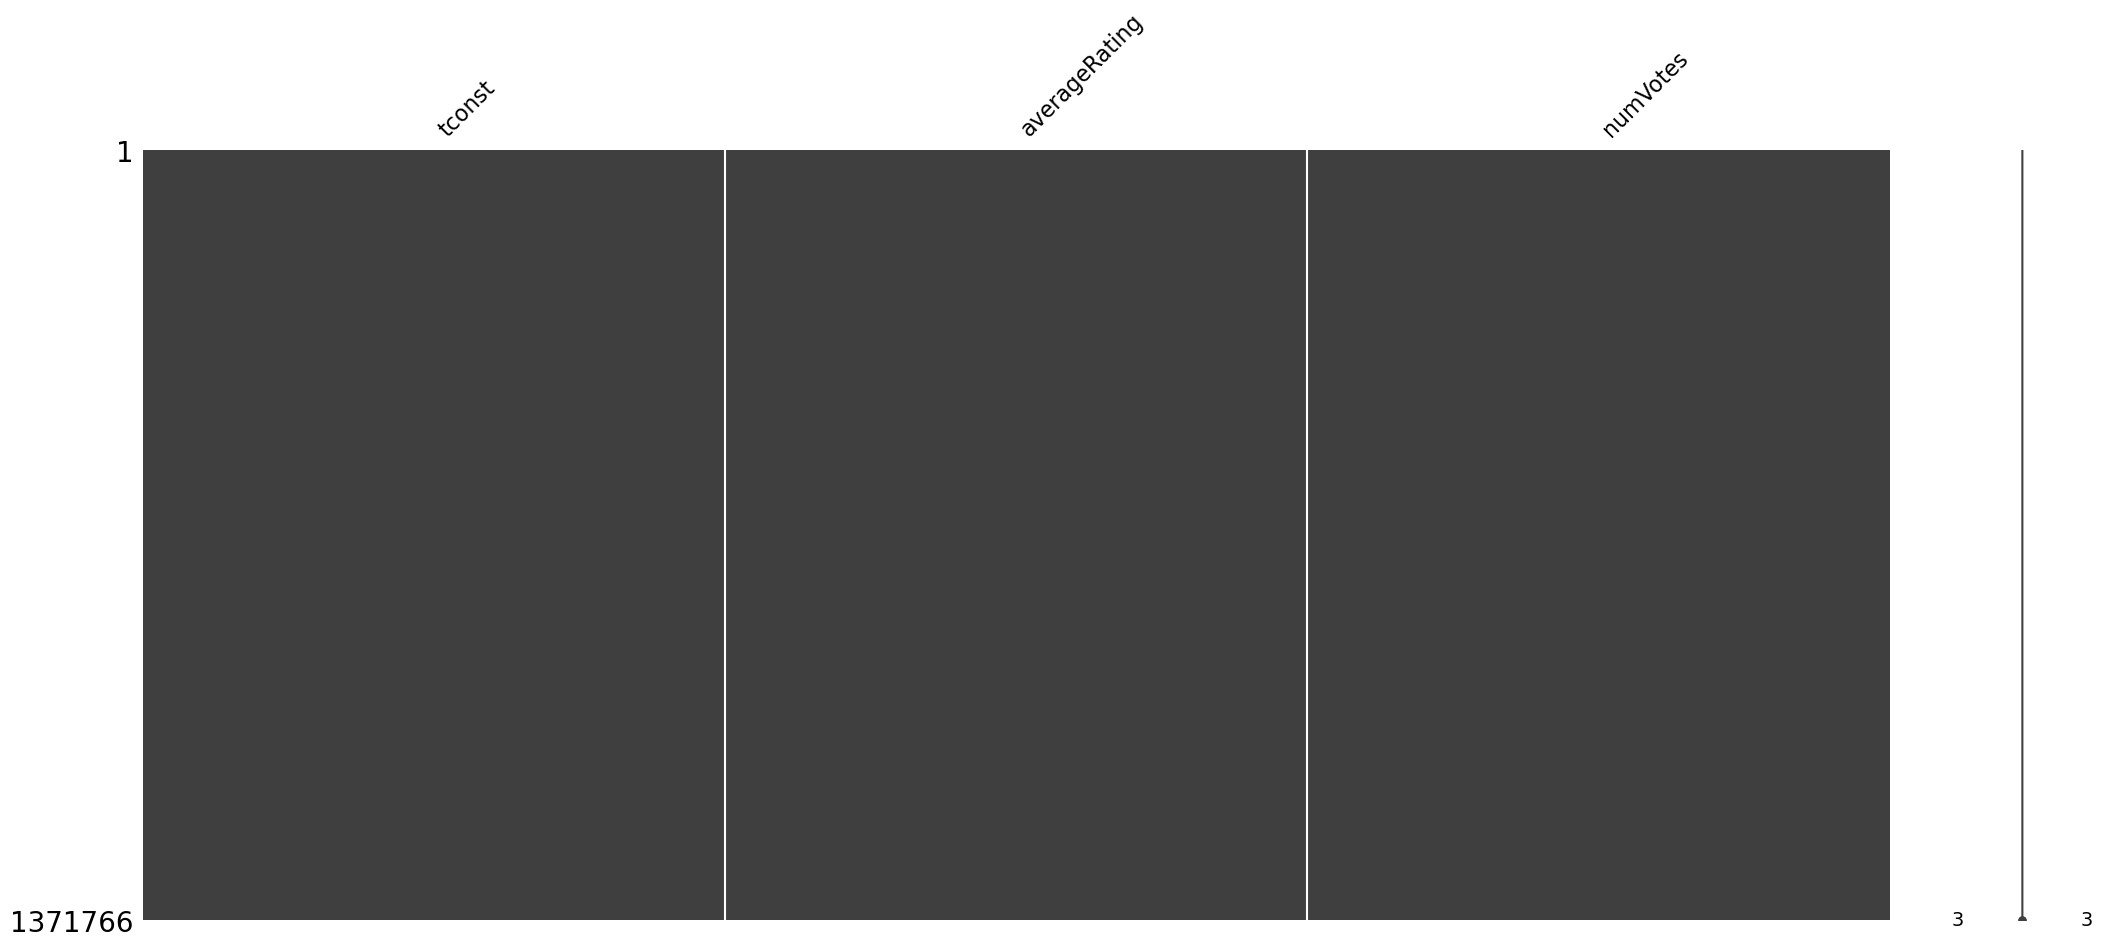

In [23]:
# Replace "\N" with np.nan (if any)
ratings.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(ratings)

## Processing Title AKAs

#### Specified Filtering Steps:
- keep only US entries.
- Replace "\N" with np.nan

In [24]:
## title AKAs
url_title_akas ="https://datasets.imdbws.com/title.akas.tsv.gz"
akas = pd.read_csv(url_title_akas,sep='\t',low_memory=False)
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37851038 entries, 0 to 37851037
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.3+ GB


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [25]:
## The AKAs file has the information on country where it released and language
akas = akas[(akas['region'] == 'US')]
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
36,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
41,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
37850564,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,\N,imdbDisplay,\N,0
37850634,tt9916620,1,The Copeland Case,US,\N,imdbDisplay,\N,0
37850723,tt9916702,1,Loving London: The Playground,US,\N,\N,\N,0
37850766,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


In [26]:
# ## check for null values
# akas.isna().sum()

,# null,% null,# unique,% unique
titleId,0,0.00,1394048,94.27
ordering,0,0.00,122,0.01
title,0,0.00,1141109,77.16
region,0,0.00,1,0.00
language,1474611,99.71,8,0.00
types,492986,33.34,13,0.00
attributes,1431057,96.77,163,0.01
isOriginalTitle,1341,0.09,2,0.00


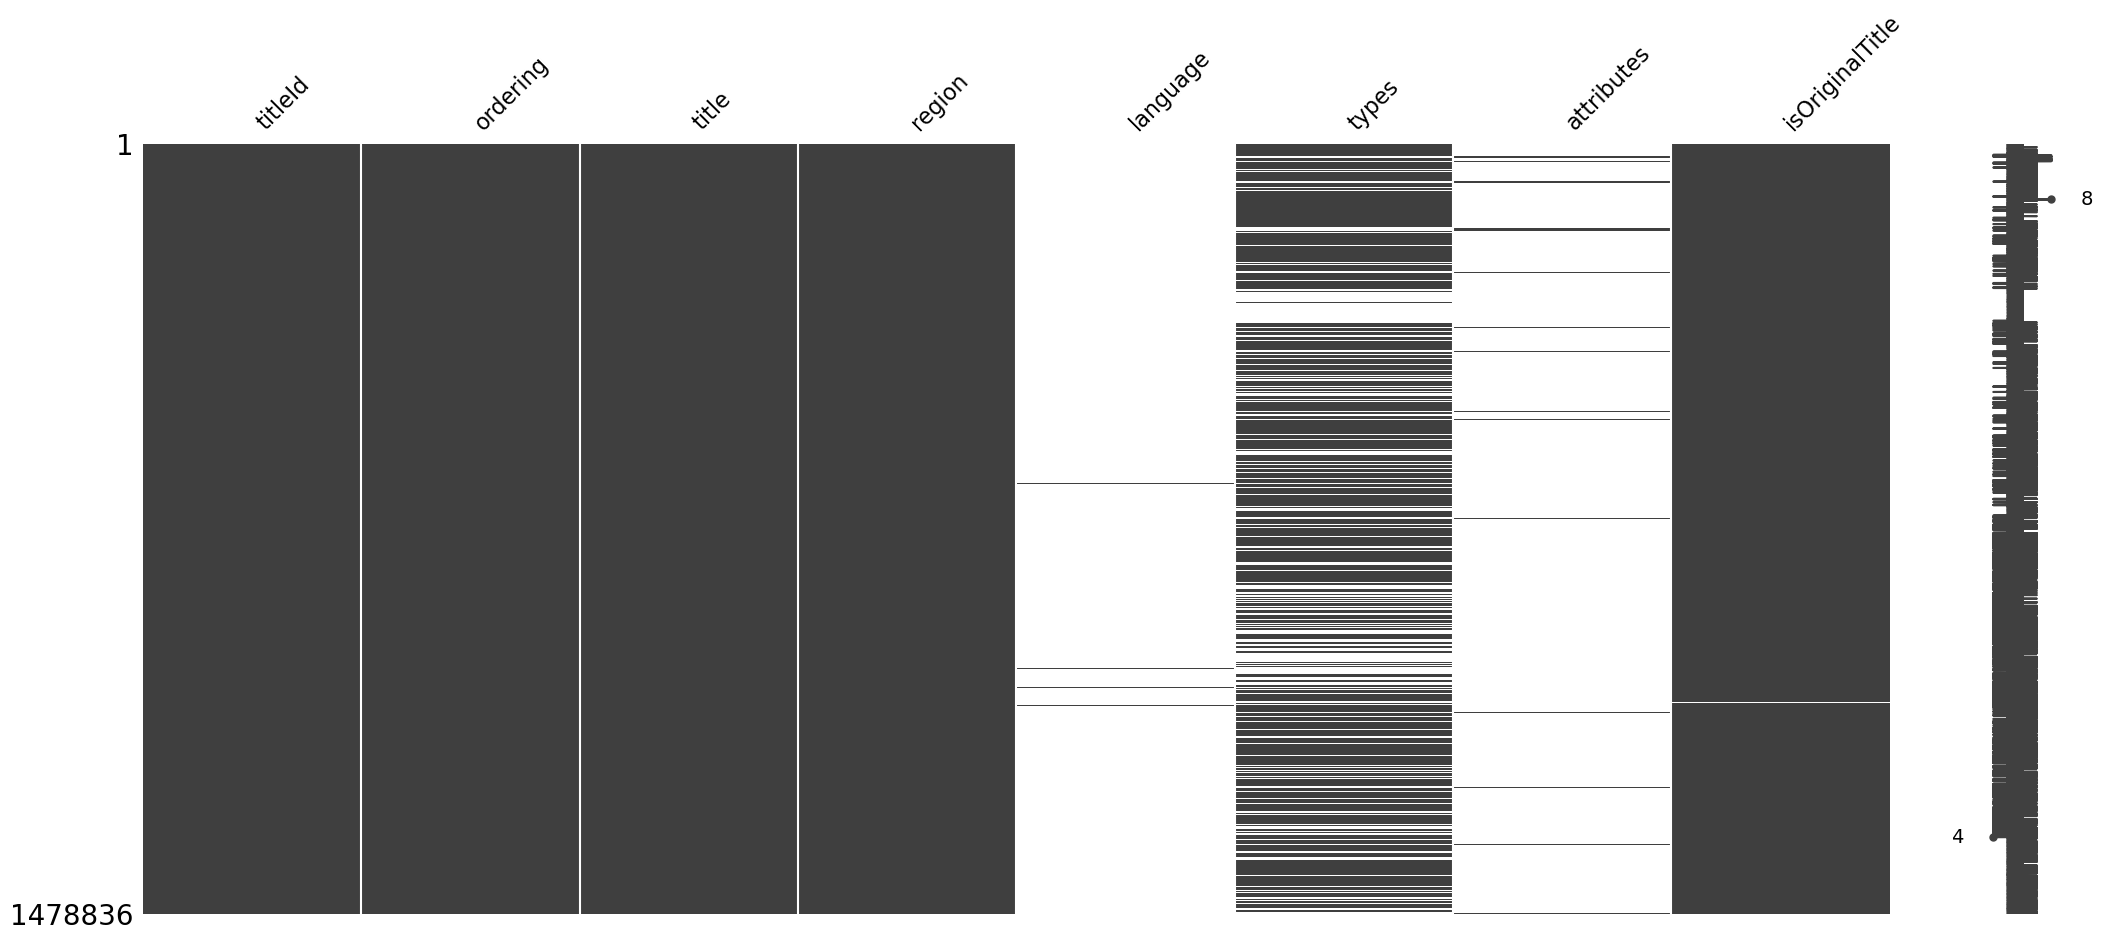

In [27]:
## replace\N placeholders with NaN and re-check for nuls
akas.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(akas)

#### Observations:
- `language`: workthless, drop it.
- `types`: explore

In [28]:
akas.drop(columns='language',inplace=True)
akas.head()

,titleId,ordering,title,region,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0


#### Exploring Types

<Axes: >

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 2 () missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


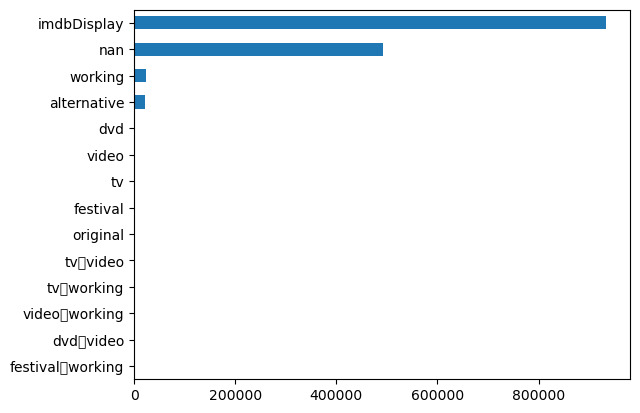

In [29]:
akas['types'].value_counts(dropna=False).sort_values().plot(kind='barh')

> Keep all types, since this table will mainly be used for filtering region and perhaps referenced later for comparing duplicate titles that had unique ids in title basics.

## Final Filtering: Removing Non-US Movies

- Now that both AKAs and basics have been processed, we can remove any movie ids from title basics that are NOT in the US-filtered AKAs dataframe.

### Removing Non-US From Title Basics

In [30]:
## Only keep movie ids that are in the final filtered akas
keepers = basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34800,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61110,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67662,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
69149,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023.0,78,Drama
80547,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008.0,94,Horror
...,...,...,...,...,...,...,...,...
10334791,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,70,Documentary
10334969,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019.0,97,"Comedy,Drama,Fantasy"
10335109,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
10335118,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"


### Removing Non-US From Ratings

- I originally used the AKAs table to filter out which movies to keep from ratings.
- I decided to compare using the AKAs table VS the using the basics table, which has already had non-US movies removed.
- Since I will 

In [31]:
## Keeping only movie that exist in basics 
keepers_akas = ratings['tconst'].isin(akas['titleId'])
keepers_basics = ratings['tconst'].isin(basics['tconst'])

print('- If filter using AKAs:')
display(keepers_akas.value_counts())

print('- If filter using Basics:')
display(keepers_basics.value_counts())

- If filter using AKAs:


False    856826
True     514940
Name: tconst, dtype: int64

- If filter using Basics:


False    1274796
True       96970
Name: tconst, dtype: int64

> **MUST DECIDE HOW TO DETERMINE FINAL KEEERS AND IF REMOVING DOCUMENTARIES OR NOT**

In [32]:
ratings_final = ratings[keepers_basics]
ratings_final

,tconst,averageRating,numVotes
17977,tt0035423,6.4,88002
40756,tt0062336,6.4,183
46630,tt0069049,6.7,7879
47975,tt0070596,7.7,43
58133,tt0082328,5.9,1759
...,...,...,...
1371687,tt9914972,7.1,290
1371712,tt9915872,6.4,9
1371725,tt9916170,7.0,7
1371726,tt9916190,3.7,248


## Saving Final Files

#### Saving Title Basics

In [33]:
## Saving and immediately loading (to verify)
basics.to_csv('Data/title_basics_cleaned.csv.gz',compression='gzip',index=False)
basics = pd.read_csv('Data/title_basics_cleaned.csv.gz')
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127375 entries, 0 to 127374
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          127375 non-null  object 
 1   titleType       127375 non-null  object 
 2   primaryTitle    127375 non-null  object 
 3   originalTitle   127375 non-null  object 
 4   isAdult         127375 non-null  int64  
 5   startYear       127375 non-null  float64
 6   runtimeMinutes  127375 non-null  int64  
 7   genres          127375 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.8+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
3,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023.0,78,Drama
4,tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008.0,94,Horror


#### Saving Title Ratings

In [34]:
ratings_final.to_csv('Data/title_ratings_cleaned.csv.gz',compression='gzip',index=False)
ratings = pd.read_csv('Data/title_ratings_cleaned.csv.gz')
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96970 entries, 0 to 96969
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         96970 non-null  object 
 1   averageRating  96970 non-null  float64
 2   numVotes       96970 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


,tconst,averageRating,numVotes
0,tt0035423,6.4,88002
1,tt0062336,6.4,183
2,tt0069049,6.7,7879
3,tt0070596,7.7,43
4,tt0082328,5.9,1759


#### Saving Title AKAs

In [35]:
akas.to_csv('Data/title_akas_cleaned.csv.gz',compression='gzip',index=False)
akas = pd.read_csv('Data/title_akas_cleaned.csv.gz')
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478836 entries, 0 to 1478835
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1478836 non-null  object 
 1   ordering         1478836 non-null  int64  
 2   title            1478836 non-null  object 
 3   region           1478836 non-null  object 
 4   types            985850 non-null   object 
 5   attributes       47779 non-null    object 
 6   isOriginalTitle  1477495 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 79.0+ MB


,titleId,ordering,title,region,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0.0


### Optional Check for files in Data folder

In [36]:
# optional 
sorted(os.listdir("Data/"))

['.DS_Store',
 '.ipynb_checkpoints',
 'For Tableau',
 'combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'name_basics.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_crew.csv.gz',
 'title_principals.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_ap

## Final Movie Count

In [37]:
print(f"There are {len(basics):,} rows in title_basics")
print(f"There are {len(ratings):,} rows in title_ratings")
print(f"There are {len(akas):,} rows in akas")

There are 127,375 rows in title_basics
There are 96,970 rows in title_ratings
There are 1,478,836 rows in akas


> See notebook "`Part 2A - TMDB API Calls.ipynb`" for the next part of the analysis.

<a name="revisit"> </a>
# **Part 1 - Revisited: Extracting IMDB Data on Cast/Crew**

- 02/10/23

In [38]:
name_basics_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
title_crew_url ="https://datasets.imdbws.com/title.crew.tsv.gz"
title_principals_url = "https://datasets.imdbws.com/title.principals.tsv.gz"

## Title Crew

In [39]:
title_crew = pd.read_csv(title_crew_url, sep='\t')
title_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
10335431,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10335432,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
10335433,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
10335434,tt9916856,nm10538645,nm6951431


In [40]:
keepers = title_crew['tconst'].isin(basics['tconst'])
keepers.sum()

127375

In [41]:
title_crew = title_crew[keepers]
title_crew

,tconst,directors,writers
34800,tt0035423,nm0003506,"nm0737216,nm0003506"
61110,tt0062336,"nm0749914,nm0765384","nm0749914,nm1146177"
67662,tt0069049,nm0000080,"nm0000080,nm0462648"
69149,tt0070596,"nm0749914,nm0765384","nm0667610,nm0749914,nm0765384"
80547,tt0082328,nm0596261,"nm0707963,nm0596261"
...,...,...,...
10334791,tt9915436,nm6119329,"nm6449800,nm10537887,nm3644375,nm6119329"
10334969,tt9915872,nm8063415,nm2507310
10335109,tt9916170,nm5412267,"nm5412267,nm6743460,nm3245789"
10335118,tt9916190,nm7308376,nm7308376


#### Saving title_crew

In [42]:
## Saving and immediately loading (to verify)
fname = 'Data/title_crew.csv.gz'
title_crew.to_csv(fname,compression='gzip',index=False)
title_crew = pd.read_csv(fname)
title_crew.info()
title_crew.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127375 entries, 0 to 127374
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     127375 non-null  object
 1   directors  127375 non-null  object
 2   writers    127375 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


,tconst,directors,writers
0,tt0035423,nm0003506,"nm0737216,nm0003506"
1,tt0062336,"nm0749914,nm0765384","nm0749914,nm1146177"
2,tt0069049,nm0000080,"nm0000080,nm0462648"
3,tt0070596,"nm0749914,nm0765384","nm0667610,nm0749914,nm0765384"
4,tt0082328,nm0596261,"nm0707963,nm0596261"


## Get list of directors and writers from final dataset

In [43]:
directors = title_crew['directors'].str.split(',').explode()
nconst_list = directors.unique().tolist()
len(nconst_list)

88971

In [44]:
writers = title_crew['writers'].str.split(',').explode()
nconst_list.extend( writers.unique().tolist())


unique_nconsts = np.unique(nconst_list)
len(unique_nconsts)

146815

## Name Basics

In [45]:
name_basics = pd.read_csv(name_basics_url, sep='\t')
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0031983,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0037382,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0080455,tt0072562,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0083922,tt0050986,tt0050976"
...,...,...,...,...,...,...
13032418,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt11657662,tt2455546"
13032419,nm9993716,Essias Loberg,\N,\N,NaN,\N
13032420,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13032421,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [46]:
idx_matched = name_basics['nconst'].isin(unique_nconsts)
idx_matched.sum()

146814

In [47]:
name_basics[idx_matched]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0083922,tt0050986,tt0050976"
17,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0050825,tt0080736,tt0049456,tt0054331"
40,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0051808,tt0089881,tt0080979,tt0047478"
53,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0053291,tt0048605,tt0045891,tt0045810"
79,nm0000080,Orson Welles,1915,1985,"actor,writer,director","tt0040525,tt0052311,tt0033467,tt0057427"
...,...,...,...,...,...,...
13031877,nm9993103,Brianna Temple,\N,\N,"actress,writer,camera_department","tt16225204,tt8281176,tt9212760,tt9486184"
13031958,nm9993197,Juanjo Braulio,\N,\N,writer,tt8743032
13032065,nm9993311,Sadegh Khoshhal,\N,\N,writer,"tt8743086,tt8743110,tt13344348,tt15249094"
13032140,nm9993398,Oliviero Del Papa,\N,\N,writer,"tt14165314,tt10941386,tt15662942,tt10270592"


In [48]:
name_basics = name_basics[idx_matched]
name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0083922,tt0050986,tt0050976"
17,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0050825,tt0080736,tt0049456,tt0054331"
40,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0051808,tt0089881,tt0080979,tt0047478"
53,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0053291,tt0048605,tt0045891,tt0045810"
79,nm0000080,Orson Welles,1915,1985,"actor,writer,director","tt0040525,tt0052311,tt0033467,tt0057427"
...,...,...,...,...,...,...
13031877,nm9993103,Brianna Temple,\N,\N,"actress,writer,camera_department","tt16225204,tt8281176,tt9212760,tt9486184"
13031958,nm9993197,Juanjo Braulio,\N,\N,writer,tt8743032
13032065,nm9993311,Sadegh Khoshhal,\N,\N,writer,"tt8743086,tt8743110,tt13344348,tt15249094"
13032140,nm9993398,Oliviero Del Papa,\N,\N,writer,"tt14165314,tt10941386,tt15662942,tt10270592"


In [49]:
# 

- Exclude anyone that is missing "knownForTitles"

In [50]:
idx_not_known = name_basics['knownForTitles'].str.contains(r'\\N')
idx_not_known.sum()

227

In [51]:
name_basics[idx_not_known]

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
664631,nm0705044,Mark Racco,\N,\N,"director,producer,writer",\N
706013,nm0749313,Jonathan Ruffle,\N,\N,"miscellaneous,producer,writer",\N
877123,nm0932469,Steve Willis,\N,\N,"director,producer",\N
1478912,nm10599895,Brice Vdh,\N,\N,"director,editor,cinematographer",\N
1770550,nm10907252,Thomas Monroe,\N,\N,"actor,composer,producer",\N
...,...,...,...,...,...,...
12593181,nm9473898,Johanners Froebel-Parker,\N,\N,writer,\N
12616317,nm9501422,Alan S. Ramadan,\N,\N,writer,\N
12791728,nm9712166,Reza Akbari,\N,\N,"actor,casting_director,director",\N
12997445,nm9952702,Bradley Bell,\N,\N,"director,writer,visual_effects",\N


In [52]:
# name_basics = name_basics[~idx_not_known]
# name_basics

In [53]:
# name_basics.memory_usage().sum() *1e-6

In [54]:
# name_basics.to_csv('')

#### Saving name_basics

In [55]:
## Saving and immediately loading (to verify)
fname = 'Data/name_basics.csv.gz'
name_basics.to_csv(fname,compression='gzip',index=False)
name_basics = pd.read_csv(fname)
name_basics.info()
name_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146814 entries, 0 to 146813
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   nconst             146814 non-null  object
 1   primaryName        146814 non-null  object
 2   birthYear          146814 non-null  object
 3   deathYear          146814 non-null  object
 4   primaryProfession  146765 non-null  object
 5   knownForTitles     146814 non-null  object
dtypes: object(6)
memory usage: 6.7+ MB


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0083922,tt0050986,tt0050976"
1,nm0000018,Kirk Douglas,1916,2020,"actor,producer,soundtrack","tt0050825,tt0080736,tt0049456,tt0054331"
2,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0051808,tt0089881,tt0080979,tt0047478"
3,nm0000054,Marilyn Monroe,1926,1962,"soundtrack,actress,writer","tt0053291,tt0048605,tt0045891,tt0045810"
4,nm0000080,Orson Welles,1915,1985,"actor,writer,director","tt0040525,tt0052311,tt0033467,tt0057427"


## Title Principles 

### title_principals

In [56]:
title_princ = pd.read_csv(title_principals_url, sep='\t')
title_princ

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
59223552,tt9916880,5,nm0584014,director,\N,\N
59223553,tt9916880,6,nm0996406,director,principal director,\N
59223554,tt9916880,7,nm1482639,writer,\N,\N
59223555,tt9916880,8,nm2586970,writer,books,\N


In [57]:
keepers = title_princ['tconst'].isin(basics['tconst'])
keepers.sum()

1041972

In [58]:
title_princ = title_princ[keepers]
title_princ

,tconst,ordering,nconst,category,job,characters
283601,tt0035423,10,nm0107463,editor,\N,\N
283602,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
283603,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
283604,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
283605,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
...,...,...,...,...,...,...
59222252,tt9916362,5,nm1893148,director,\N,\N
59222253,tt9916362,6,nm3471432,writer,screenplay by,\N
59222254,tt9916362,7,nm2970042,producer,executive producer,\N
59222255,tt9916362,8,nm4065853,producer,producer,\N


#### Saving title_principals

In [59]:
## Saving and immediately loading (to verify)
fname = 'Data/title_principals.csv.gz'
title_princ.to_csv(fname,compression='gzip',index=False)
title_princ = pd.read_csv(fname)
title_princ.info()
title_princ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041972 entries, 0 to 1041971
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1041972 non-null  object
 1   ordering    1041972 non-null  int64 
 2   nconst      1041972 non-null  object
 3   category    1041972 non-null  object
 4   job         1041972 non-null  object
 5   characters  1041972 non-null  object
dtypes: int64(1), object(5)
memory usage: 47.7+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0035423,10,nm0107463,editor,\N,\N
1,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
2,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
3,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
4,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"


## Post-Saving Exploration

In [62]:
basics[basics['primaryTitle'].str.contains("Marvel")]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
14016,tt0800347,movie,Marvelous,Marvelous,0,2006.0,90,"Comedy,Drama"
20994,tt10676048,movie,The Marvels,The Marvels,0,2023.0,105,"Action,Adventure,Fantasy"
21198,tt10713444,movie,Merely Marvelous: The Dancing Genius of Gwen V...,Merely Marvelous: The Dancing Genius of Gwen V...,0,2019.0,82,Documentary
24858,tt11389868,movie,Marvelous and the Black Hole,Marvelous and the Black Hole,0,2021.0,81,"Comedy,Drama"
26672,tt11760456,movie,Peter Pan: A Marvel in the Making,Peter Pan: A Marvel in the Making,0,2019.0,52,Documentary
31042,tt12692980,movie,Thomas & Friends: Marvelous Machinery,Thomas & Friends: Marvelous Machinery,0,2020.0,45,"Action,Adventure,Animation"
38103,tt13885628,movie,Marvel's Behind the Mask,Marvel's Behind the Mask,0,2021.0,64,Documentary
38160,tt13895038,movie,We're the Marvels,We're the Marvels,0,2021.0,74,Drama
43148,tt14873094,movie,Dorothy and Toto's Storytime: The Marvelous La...,Dorothy and Toto's Storytime: The Marvelous La...,0,2021.0,80,Family
49764,tt1631359,movie,Maggie Marvel,Maggie Marvel,0,2011.0,90,"Comedy,Drama"
